In [6]:
include("main.jl")
using CairoMakie

/Users/luisastue/miniconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
histories = Dict(
    :Simple => load_history_from_json("json/dirichlet/history/Simple.json"),
    :Medium => load_history_from_json("json/dirichlet/history/Medium.json"),
    :None => load_history_from_json("json/dirichlet/history/None.json"),
    # :Softmax => load_jld("data/mcmc/history/SoftmaxPPL.jld"),
    # :SimplePPL => load_jld("data/mcmc/history/SimplePPL.jld"),
    :DQN => load_history_from_json("json/dqn/history/DQN.json"),
)

Dict{Symbol, HistoryType} with 4 entries:
  :None   => HistoryType(Dict(16=>[-0.663, -0.634, -0.6236, -0.6881, -0.6865, -…
  :Medium => HistoryType(Dict(16=>[-0.5974, -0.5614, -0.5156, -0.5595, -0.5253,…
  :DQN    => HistoryType(Dict(64=>[-0.55991, -0.61872, -0.61861], 16=>[-0.55729…
  :Simple => HistoryType(Dict(16=>[-0.383, -0.3707, -0.3729, -0.3825, -0.3454, …

In [3]:
runs = Dict(
    :Softmax => [load_jld("data/mcmc/runs/history-SoftmaxPPL-$i.jld")  for i in 1:10],
    :SimplePPL => [load_jld("data/mcmc/runs/history-SimplePPL-$i.jld")  for i in 1:10]
)

Dict{Symbol, Vector{RunData}} with 2 entries:
  :Softmax   => [RunData("history-SoftmaxPPL-1", :Softmax, ModelData(DynamicCho…
  :SimplePPL => [RunData("history-SimplePPL-1", :SimplePPL, ModelData(DynamicCh…

In [ ]:
mcmc_data = run_mcmc(runs[:SimplePPL][10].model, simple_functions, 200)

In [6]:
m, p = evaluate_mcmc(mcmc_data, simple_functions)

UndefVarError: UndefVarError: `mcmc_data` not defined

In [7]:
simple_mean_reward_samples = Dict()
for (i, run) in enumerate(runs[:SimplePPL])
    simple_mean_reward_samples[i] = run.mean_rewards
end

In [8]:
# using JSON3

# function save_ts_to_json(ts_instance::HistoryType, file_path::String)
#     json_data = Dict(
#         "mean_rewards" => ts_instance.mean_rewards,
#         "name" => ts_instance.name,
#         "info" => ts_instance.info
#     )
#     JSON3.write(file_path, json_data)
# end


In [9]:

# using PyCall
# sepsis_gym = pyimport("custom_sepsis")

# mean_rewards = Dict()
# for len in 1:100000000
#     if log2(len) % 1 != 0
#         continue
#     end
#     mean_rewards[len] = [sepsis_gym.train_dqn(sepsis_gym.true_env, len, len).evaluate_policy(100000) for _ in 1:3]
#     history = HistoryType(mean_rewards, "DQN", Dict("name" => "DQN"))
#     save_ts_to_json(history, "json/dqn/history/DQN.json")
# end


In [8]:
random_mean = -0.6662000000000002 # mean([sepsis_gym.evaluate_policy(sepsis_gym.random_policy(), 1000) for i in 1:100])

-0.6662000000000002

In [9]:
dqn = load_dqn_from_json("json/dqn/DQN-mean-rewards-1M.json")


DQNType([-0.6333333253860474, -0.7666666507720947, -0.7333333492279053, -0.5333333611488342, -0.699999988079071, -0.4000000059604645, -0.699999988079071, -0.6333333253860474, -0.5666666626930237, -0.6333333253860474  …  -0.20000000298023224, -0.03333333507180214, -0.20000000298023224, -0.1666666716337204, -0.10000000149011612, -0.23333333432674408, -0.3333333432674408, 0.06666667014360428, -0.03333333507180214, -0.30000001192092896], [0.4818944036960602, 0.49553561210632324, 0.4422166347503662, 0.5617433786392212, 0.4582575857639313, 0.6110100746154785, 0.5259911417961121, 0.546707272529602, 0.6155394315719604, 0.4818944036960602  …  0.7483315467834473, 0.7520343065261841, 0.6531972885131836, 0.7340905070304871, 0.699999988079071, 0.7608475089073181, 0.7453559637069702, 0.6289320588111877, 0.6574360728263855, 0.6904104351997375], "DQN", Dict("description" => "Mean rewards for DQN over 30 runs with 140172 episode interactions"))

In [10]:

function add_dqn_local!(ax, dqn, window_size)
    smoothed = moving_avg(dqn.mean_rewards, window_size)

    lines!(ax, 1:length(smoothed), smoothed, color=(colors_dict[:DQN]), label="DQN_1M",)
    # lines!(ax, 1:length(dqn.mean_rewards), dqn.mean_rewards, color=(colors_dict[:DQN], 0.2), label="Mean Reward of 50 DQN runs")
    # band!(ax, 1:length(smoothed_std), smoothed .- smoothed_std, smoothed .- smoothed_std, color=(colors_dict[:DQN], 0.2))
    return smoothed
end



add_dqn_local! (generic function with 1 method)

In [11]:
using CairoMakie
using Statistics

# Example: Assuming you have 5 different dictionaries stored in a list

function plot_histories(histories, window_size=1, labels=[:SimplePPL, :Softmax, :Simple, :Medium, :None, :DQN], dqn=nothing, x_lim=nothing)

    # Create a figure
    fig = Figure(resolution = (800, 600))
    ax = Axis(fig[1, 1], xscale=log10, xlabel = "History Size (Number of Episodes)", ylabel = "Mean Rewards Across 100'000 Episodes", title = "Mean Rewards for 10 Samples out of a Posterior over a Sequential Random History")

    if dqn != nothing
        add_dqn_local!(ax, dqn, 1000)
    end
    # Plot each dataset
    for (i, type) in enumerate(labels)
        mean_rewards = histories[type].mean_rewards
        # Prepare data
        x_vals = sort(collect(keys(mean_rewards)))
        y_means = [mean(mean_rewards[x]) for x in x_vals]
        y_stds = [std(mean_rewards[x]) for x in x_vals]

        # Collect all (x, y) pairs for scatter
        scatter_x = []
        scatter_y = []
        for x in x_vals
            ys = mean_rewards[x]
            append!(scatter_x, fill(x, length(ys)))  # Repeat x for each y
            append!(scatter_y, ys)                  # Collect y values
        end

        smoothed_mean_rewards = moving_avg(y_means, window_size)
        smoothed_std_rewards = Float64.(moving_avg(y_stds, window_size))


        # Add scatter plot for all points
        scatter!(ax, scatter_x, scatter_y, color = (colors_dict[type], 0.2), label = label_dict[type])

        # Add error band (variance) at the mean points
        band!(ax, x_vals, smoothed_mean_rewards .- smoothed_std_rewards, smoothed_mean_rewards .+ smoothed_std_rewards, color = (colors_dict[type], 0.2), )

        # Add line for the mean points
        # lines!(ax, x_vals, smoothed_mean_rewards, color = colors_dict[type], label = label_dict[type])
    end
    if x_lim != nothing
        xlims!(ax, 1, x_lim)
    end


    # Add a legend
    axislegend(ax, position=(:right, :bottom))
    ylims!(ax, -1, 0)
    ax.yticks = -1:0.05:0


    # Display the plot
    return fig, ax
end


plot_histories (generic function with 5 methods)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


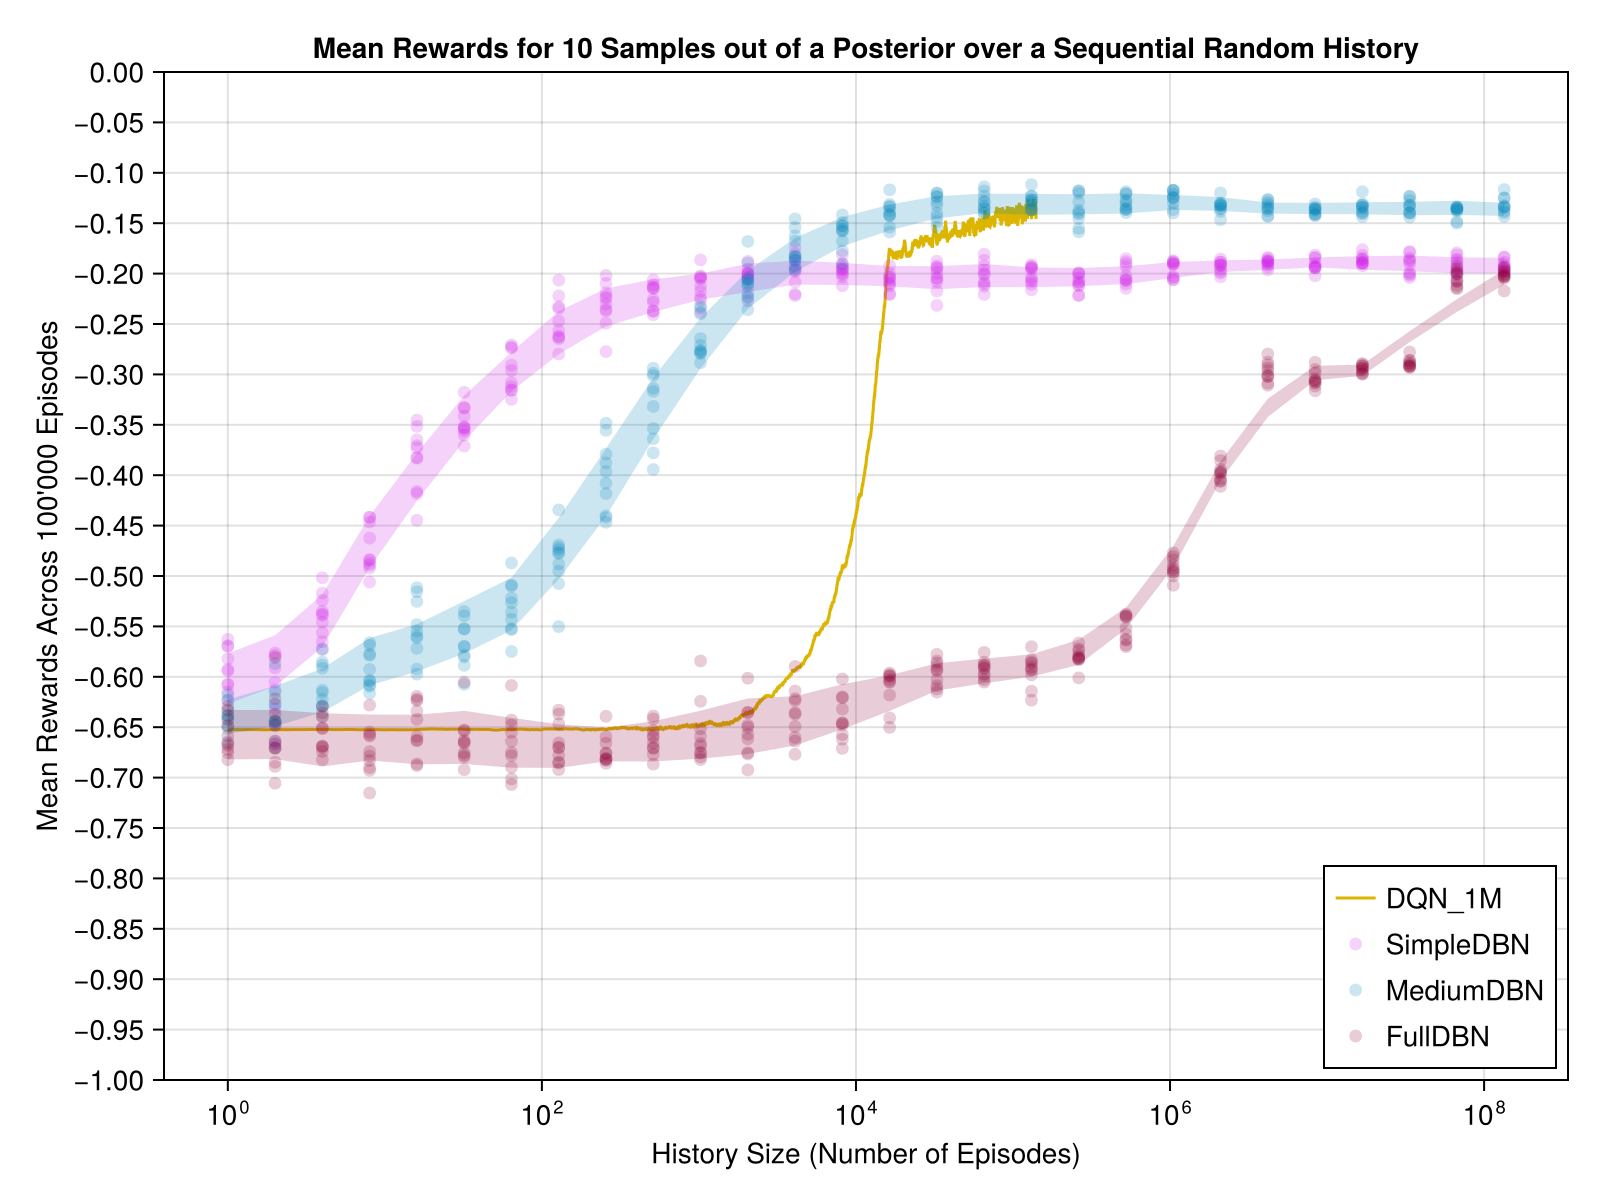

In [16]:
fig, ax = plot_histories(histories, 3, [ :Simple, :Medium, :None], dqn)
fig

In [14]:
function plot_scores(model)
    ks = sort(collect(keys(model.mcmcs)))
    fig = Figure()
    ax = Axis(fig[1, 1])

    # for k in ks
        lines!(ax, model.mcmcs[ks[end]].scores, label=string(ks[end]))
    # end

    axislegend(ax, position=(:right, :bottom))
    fig
    
end

plot_scores (generic function with 1 method)

In [15]:
finer = Dict(
    :Softmax => load_jld("data/mcmc/history/SoftmaxPPL-finer.jld"),
    :SimplePPL => load_jld("data/mcmc/history/SimplePPL-finer.jld"),
)

UndefVarError: UndefVarError: `History` not defined

In [16]:
indices = [ 2,3,4,6,10,16,25,40,63,100]

10-element Vector{Int64}:
   2
   3
   4
   6
  10
  16
  25
  40
  63
 100

In [17]:
plot_scores(independent_histories[:SimplePPL][40][1])

UndefVarError: UndefVarError: `independent_histories` not defined

In [18]:
independent = Dict(
    :SimplePPL => HistoryType(
        Dict(i => [model.mean_rewards[i][1] for model in independent_histories[:SimplePPL][i]] for i in indices),
        "SimplePPL",
        Dict("name" => "SimplePPL")
    ),
    :Softmax => HistoryType(
        Dict(i => [model.mean_rewards[i][1] for model in independent_histories[:Softmax][i]] for i in indices),
        "Softmax",
        Dict("name" => "Softmax")
    ))

UndefVarError: UndefVarError: `independent_histories` not defined

In [19]:
with_indep = Dict(
    :Simple => histories[:Simple],
    :Medium => histories[:Medium],
    :None => histories[:None],
    :SimplePPL => independent[:SimplePPL],
    :Softmax => independent[:Softmax],
)

UndefVarError: UndefVarError: `independent` not defined

In [20]:
plot_histories(with_indep, 1, [:Simple, :Medium, :None, :SimplePPL, :Softmax])


UndefVarError: UndefVarError: `with_indep` not defined

In [22]:
plot_scores(histories[:SimplePPL])

KeyError: KeyError: key :SimplePPL not found

In [23]:
using Gen
nested_view(histories[:SimplePPL].model.choices)[:episodes]

KeyError: KeyError: key :SimplePPL not found

In [24]:
maximum(keys(histories[:SimplePPL].policies))

KeyError: KeyError: key :SimplePPL not found

In [25]:
length(histories[:SimplePPL].model.policies)

KeyError: KeyError: key :SimplePPL not found

In [27]:
plot_histories(histories, 1, [:SimplePPL, :Softmax], 1000000)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


KeyError: KeyError: key :SimplePPL not found

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


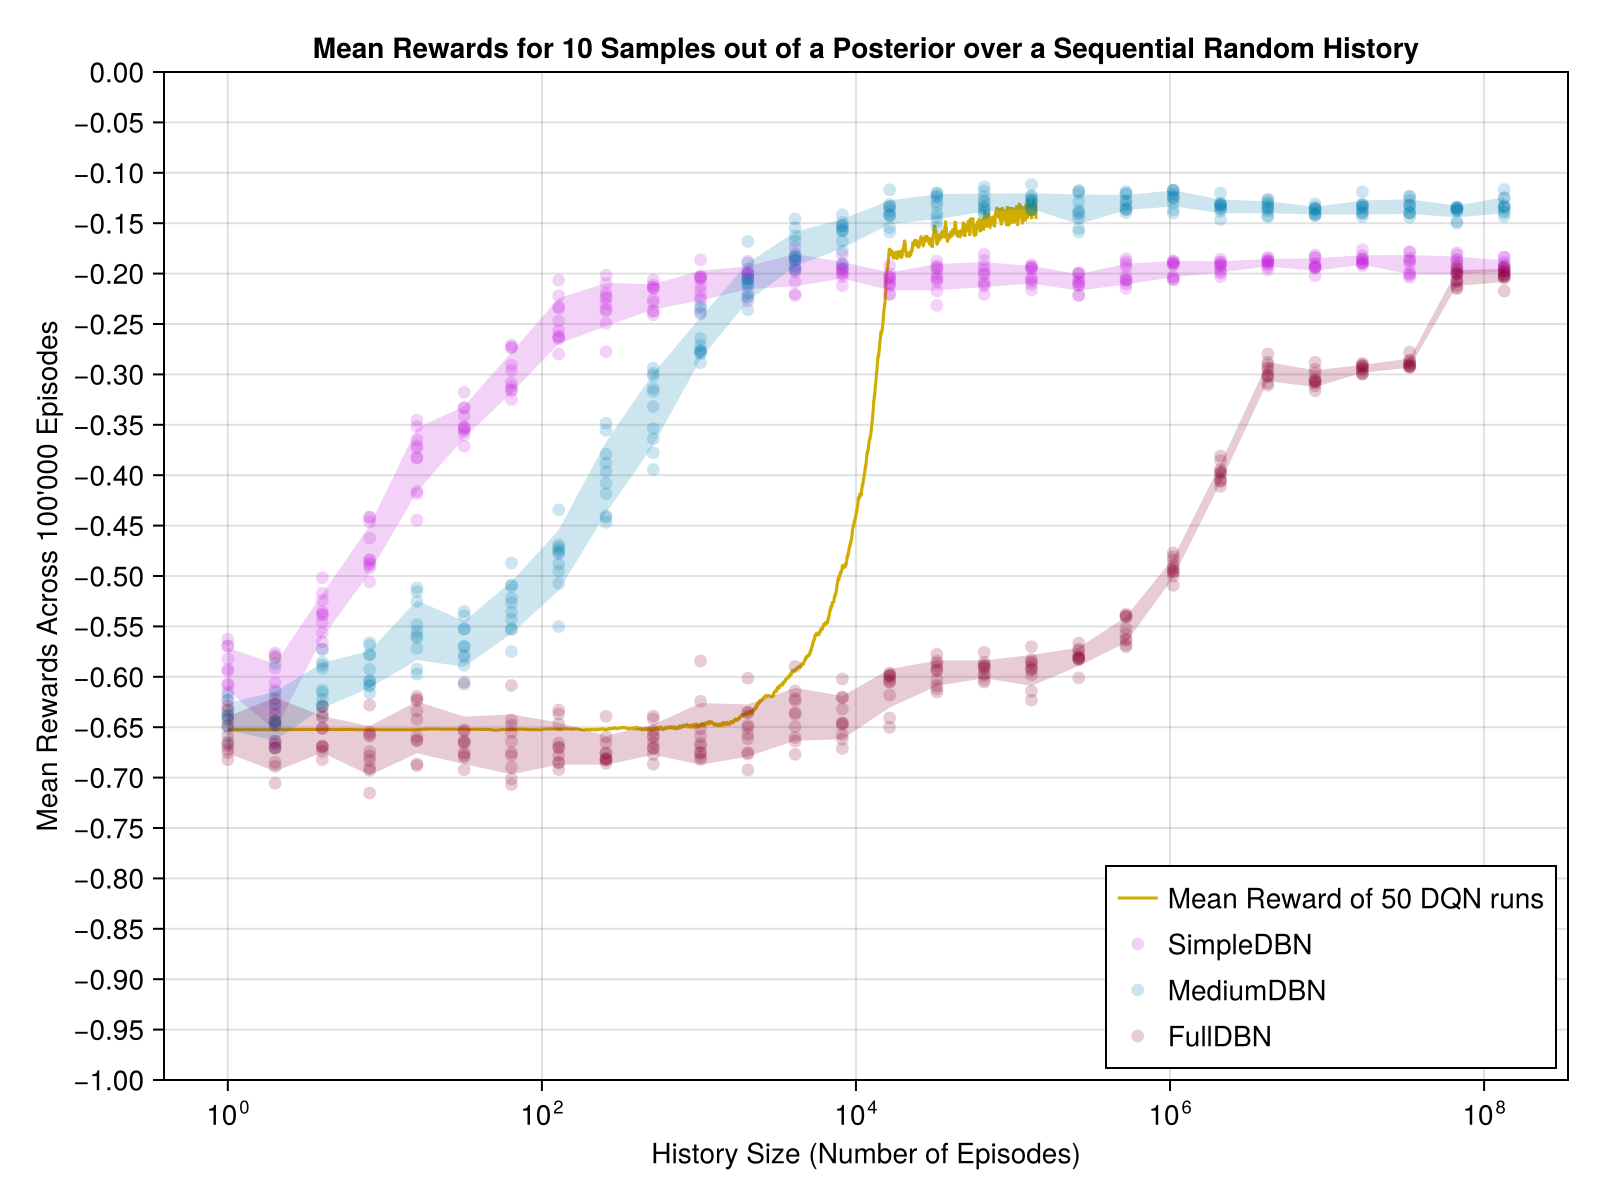

In [68]:
plot_histories(histories, 1, [:Simple, :Medium, :None], dqn)


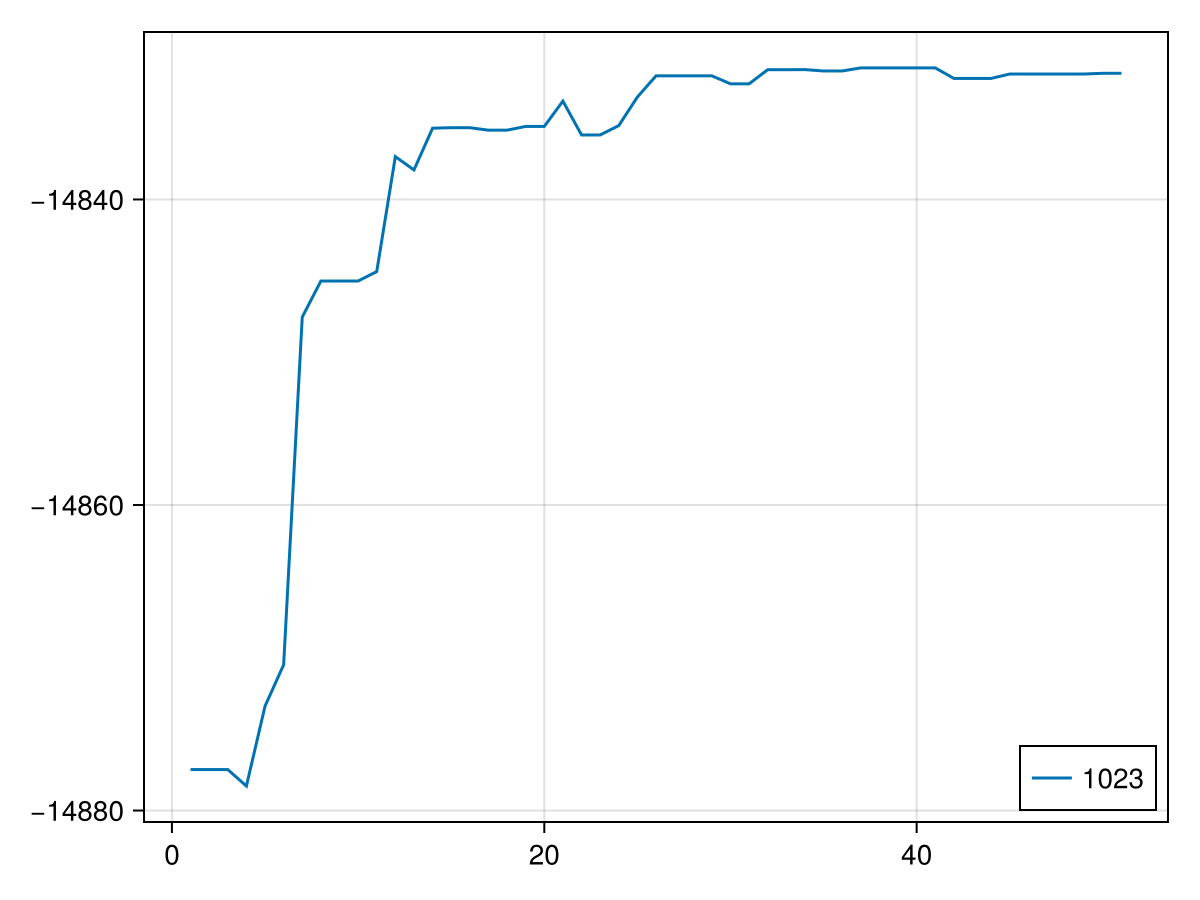

In [29]:
plot_scores(runs[:SimplePPL][7])